# Final Project Exploratory Data Analysis

Do your EDA in this notebook!

## Questions:
1. What majors provide the lowest unemployment rate?
2. Which majors are most/least common?
3. Is the difference between medain and P75th similar between all majors or is it all relative to pay scale?
4. What majors provide the most steady jobs?
5. How many majors fall into each category?
6. Is the data actually accurate for analysis?

In [1]:
import pandas as pd
import os

In [2]:
pwd

'/mnt/c/Users/Public/Documents/dev/course-materials/final-project-template'

In [3]:
major_data = pd.read_csv('/mnt/c/Users/Public/Documents/dev/course-materials/final-project-template/data/all-ages.csv')

In [4]:
major_data.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [5]:
major_data.tail()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
168,6211,HOSPITALITY MANAGEMENT,Business,200854,163393,122499,8862,0.051447,49000,33000,70000.0
169,6212,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,Business,156673,134478,118249,6186,0.043977,72000,50000,100000.0
170,6299,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,Business,102753,77471,61603,4308,0.052679,53000,36000,83000.0
171,6402,HISTORY,Humanities & Liberal Arts,712509,478416,354163,33725,0.065851,50000,35000,80000.0
172,6403,UNITED STATES HISTORY,Humanities & Liberal Arts,17746,11887,8204,943,0.073500,50000,39000,81000.0


In [6]:
major_data[['Unemployment_rate']].describe()

,Unemployment_rate
count,173.000000
mean,0.057355
std,0.019177
min,0.000000
25%,0.046261
50%,0.054719
75%,0.069043
max,0.156147


In [7]:
major_data.shape

(173, 11)

In [8]:
major_data.isnull().sum()

Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [9]:
major_data['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

value_counts() shows how many different types of majors there are within a categroy

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '')

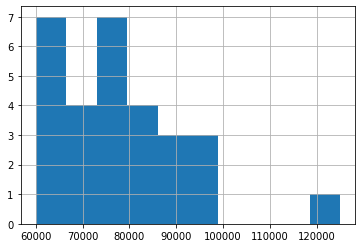

In [11]:
Engineer_wages = major_data[major_data['Major_category'] == 'Engineering']['Median'].hist();
Engineer_wages.title


In [12]:
major_data['Major_category'].unique()

array(['Agriculture & Natural Resources', 'Biology & Life Science',
       'Engineering', 'Humanities & Liberal Arts',
       'Communications & Journalism', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Education',
       'Law & Public Policy', 'Interdisciplinary', 'Health',
       'Social Science', 'Physical Sciences', 'Psychology & Social Work',
       'Arts', 'Business'], dtype=object)

In [13]:
major_data['Unemployment_rate'].mean()

0.05735545328323702

In [14]:
major_data[(major_data['Major_category'] == 'Engineering') & (major_data['P75th'] > 120000.0)]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
51,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,3350,0,0.000000,85000,55000,125000.0
55,2415,METALLURGICAL ENGINEERING,Engineering,12818,6939,5462,326,0.044873,96000,65000,123000.0
56,2416,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,6419,366,0.047032,92000,52000,124000.0
57,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,9226,449,0.040309,97000,60000,125000.0
58,2418,NUCLEAR ENGINEERING,Engineering,9826,7320,6474,527,0.067159,95000,65000,128000.0
59,2419,PETROLEUM ENGINEERING,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0


In [15]:
major_data[major_data['Major'] == 'COMPUTER ENGINEERING']

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
47,2407,COMPUTER ENGINEERING,Engineering,154160,128742,111025,7456,0.054744,80000,60000,107000.0


In [16]:
pd.DataFrame(major_data[['Major', 'P75th']])

,Major,P75th
0,GENERAL AGRICULTURE,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,80000.0
2,AGRICULTURAL ECONOMICS,98000.0
3,ANIMAL SCIENCES,72000.0
4,FOOD SCIENCE,90000.0
...,...,...
168,HOSPITALITY MANAGEMENT,70000.0
169,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,100000.0
170,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,83000.0
171,HISTORY,80000.0


Text(0.5, 0, '')

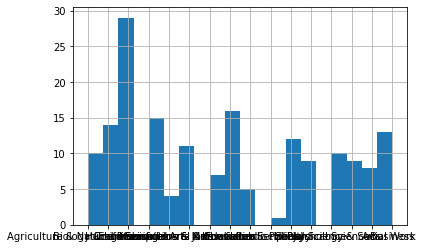

In [17]:
major_data['Major_category'].hist(bins=20)
plt.xlabel('')